# 📊 Cálculos e Análises

Bem-vindo à seção de **Cálculos** da dashboard!  
Aqui você encontrará todas as métricas, fórmulas e análises essenciais para interpretar os dados de forma clara e eficiente.

---

> **Explore os resultados, compare indicadores e tome decisões baseadas em dados!**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/banco_agro_projeto_limpo.csv")

In [3]:
df

,Produto,Estoque,Vendidos,Data_de_vendas,Vendedor,cidade,latitude,longitude,Preco_kg,Faturamento,Não_vendidos
0,Café,466,277,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308,38.57,10683.89,17973.62
1,Soja,191,37,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896,2.33,86.21,445.03
2,Cana-de-açúcar,241,241,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166,1.28,308.48,308.48
3,Arroz,222,283,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237,1.56,441.48,346.32
4,Arroz,370,432,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400,1.56,673.92,577.20
...,...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,493,336,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308,1.56,524.16,769.08
1996,Cana-de-açúcar,457,385,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658,1.28,492.80,584.96
1997,Algodão,316,276,2029-06-20,Maria,Recife,-8.047560,-34.877000,17.68,4879.68,5586.88
1998,Trigo,65,319,2029-06-21,João,Salvador,-12.971399,-38.501305,1.42,452.98,92.30


In [4]:
df.describe()

,Estoque,Vendidos,latitude,longitude,Preco_kg,Faturamento,Não_vendidos
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,487.692000,259.006000,-16.501316,-45.410686,9.057880,2322.346915,4356.936665
std,287.213426,173.592126,8.915990,6.957261,12.940259,4276.588454,7776.863551
min,0.000000,1.000000,-30.034647,-60.025000,1.090000,1.090000,0.000000
25%,243.000000,119.000000,-23.550520,-49.267137,1.280000,244.420000,484.125000
50%,479.500000,244.000000,-19.924502,-46.633308,1.560000,496.290000,968.220000
75%,736.000000,377.000000,-8.047560,-38.543400,17.680000,1578.400000,2907.470000
max,999.000000,998.000000,-3.101940,-34.877000,38.570000,37798.600000,38492.860000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         2000 non-null   object 
 1   Estoque         2000 non-null   int64  
 2   Vendidos        2000 non-null   int64  
 3   Data_de_vendas  2000 non-null   object 
 4   Vendedor        2000 non-null   object 
 5   cidade          2000 non-null   object 
 6   latitude        2000 non-null   float64
 7   longitude       2000 non-null   float64
 8   Preco_kg        2000 non-null   float64
 9   Faturamento     2000 non-null   float64
 10  Não_vendidos    2000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


## Informações básicas

In [6]:
df['Vendidos'].sum() #total de produtos vendidos  

np.int64(518012)

In [7]:
df['Estoque'].sum() #total em estoque não vendido


np.int64(975384)

In [8]:
df['Preco_kg'].unique()

array([38.57,  2.33,  1.28,  1.56, 17.68,  1.42,  1.09])

In [9]:
df['Preco_kg'].mean() # preço médio por kg
# como temos dois valores com 38 e 17 eles aumentam e muito o valor dos nossos produtos, mas entretanto observamos
# que temois mais produtos baratos que caros 

np.float64(9.05788)

In [10]:
df.groupby('Produto')['Vendidos'].sum().reset_index().sort_values(by='Vendidos', ascending=False) # total vendido por produto  
# Percebemos que o algodão vende muito mesmo ele sendo extremamente barato

,Produto,Vendidos
0,Algodão,84813
6,Trigo,82231
1,Arroz,73925
5,Soja,71977
3,Cana-de-açúcar,70430
4,Milho,67707
2,Café,66929


In [11]:
df.groupby('Produto')['Estoque'].sum().reset_index().sort_values(by='Estoque', ascending=False) # total de estoque por produto  
# Notamos que o trigo é oque mias está em estoque, mesmo ele vendendo muito, é possível repensar não só com o trigo mas com todos os outros produtos sobre se devemos produzir tanto

,Produto,Estoque
6,Trigo,152750
0,Algodão,151739
3,Cana-de-açúcar,139702
5,Soja,138778
1,Arroz,136524
2,Café,128606
4,Milho,127285


## Faturamento sobre cada item da tabela

In [12]:
df['Produto'].unique()

array(['Café', 'Soja', 'Cana-de-açúcar', 'Arroz', 'Algodão', 'Trigo',
       'Milho'], dtype=object)

In [13]:

df['Faturamento'] = df['Vendidos'] * df['Preco_kg']
faturamento_total = df.groupby('Produto')['Faturamento'].sum().reset_index().round().sort_values(by="Faturamento", ascending=False)
faturamento_total
# Mesmo o algodão sendo mais vendido o café nos rende mais, mesmo sendo o que menos vende entre todos os produtos# Percebemos tambêm que o milho vende pouco e faturou pouco, logo é nescessário discutir sobre a continuidade de cultiva-lo



,Produto,Faturamento
2,Café,2581452.0
0,Algodão,1499494.0
5,Soja,167706.0
6,Trigo,116768.0
1,Arroz,115323.0
3,Cana-de-açúcar,90150.0
4,Milho,73801.0


In [14]:
print(faturamento_total.sum())
ft = faturamento_total.sum()
ft
#Faturamento total obtido das vendas dos produtos

Produto        CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Faturamento                                       4644694.0
dtype: object


Produto        CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Faturamento                                       4644694.0
dtype: object

## Itens não vendidos(Em estoque)

In [15]:
# Calculando a perda de cada linha
df["Não_vendidos"] = df['Estoque'] * df["Preco_kg"]

# Agrupando pelo produto
Perdas = df.groupby('Produto')['Não_vendidos'].sum().round(2).reset_index().sort_values(by="Não_vendidos", ascending=False)

print(Perdas)



          Produto  Não_vendidos
2            Café    4960333.42
0         Algodão    2682745.52
5            Soja     323352.74
6           Trigo     216905.00
1           Arroz     212977.44
3  Cana-de-açúcar     178818.56
4           Milho     138740.65


In [16]:
print(Perdas.sum())
p = Perdas.sum()
p

Produto         CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Não_vendidos                                      8713873.33
dtype: object


Produto         CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Não_vendidos                                      8713873.33
dtype: object

In [17]:
print(faturamento_total.sum(),Perdas.sum())

Produto        CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Faturamento                                       4644694.0
dtype: object Produto         CaféAlgodãoSojaTrigoArrozCana-de-açúcarMilho
Não_vendidos                                      8713873.33
dtype: object


In [18]:
Indice = 4644694.0 / 8713873.33
Indice
# Através desse calculo sobre o faturamneto total e perdas descobrimos que estamos estocamndo mais doque vendendendo 

0.5330228962600722

### Cidade com maiores Faturamentos e vendederoes com maiores Faturamentos

In [19]:
City_F = df.groupby('cidade')['Faturamento'].sum().reset_index().round().sort_values(by = 'Faturamento', ascending=False)
City_F

,cidade,Faturamento
9,São Paulo,555279.0
4,Manaus,494631.0
7,Rio de Janeiro,481187.0
6,Recife,481039.0
3,Fortaleza,477431.0
1,Brasília,455123.0
8,Salvador,431106.0
2,Curitiba,428082.0
0,Belo Horizonte,426561.0
5,Porto Alegre,414254.0


In [20]:
sales_F = df.groupby('Vendedor')['Faturamento'].sum().reset_index().round().sort_values(by = 'Faturamento', ascending=False)
sales_F

,Vendedor,Faturamento
6,Patrícia,684681.0
3,Fernanda,612031.0
7,Pedro,606358.0
0,Ana,530639.0
1,Carlos,523892.0
5,Maria,500050.0
8,Ricardo,499178.0
4,João,387170.0
2,Desconhecido,300693.0


### Cidade com maiores Vendas e vendederoes com maiores Vendas

In [21]:
City_Maior = df.groupby('cidade')['Vendidos'].sum().reset_index().round().sort_values(by = 'Vendidos', ascending=False)
City_Maior
#Constatamos que o Rio de Janeiro e Fortaleza foram os estados que mais venderam


,cidade,Vendidos
7,Rio de Janeiro,59943
3,Fortaleza,56701
9,São Paulo,56548
6,Recife,52194
2,Curitiba,51371
8,Salvador,50931
4,Manaus,49572
1,Brasília,48192
5,Porto Alegre,47138
0,Belo Horizonte,45422


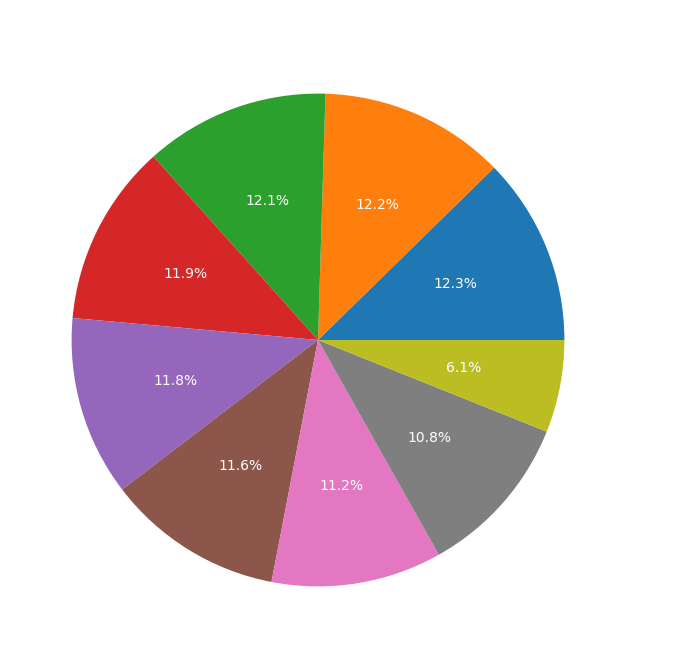

In [22]:
import matplotlib.pyplot as plt
sales_Maior = df.groupby('Vendedor')['Vendidos'].sum().reset_index().round().sort_values(by = 'Vendidos', ascending=False)
sales_Maior
fig, ax = plt.subplots(figsize=(8, 8), facecolor='none')  # ou facecolor='transparent'
ax.pie(
    sales_Maior['Vendidos'],
    labels=sales_Maior['Vendedor'],
    autopct='%1.1f%%',
    textprops={'color': 'white'}
)
plt.title('Total Vendido por Vendedor',color='white')
plt.show()
# Constatamos que Patrícia e Ricardo foram os vendedores que mais venderam

### Data com maiores vendas

In [23]:
df['Data_de_vendas'] = pd.to_datetime(df['Data_de_vendas'], errors='coerce')
# Transforma no formato de data


In [24]:
date_Maior = df.groupby('Data_de_vendas')['Vendidos'].sum().reset_index().round().sort_values(by = 'Vendidos', ascending=False)
date_Maior
# Percebemos que o dia 14 do mes 10 de 2025 foi o dia que mias obtivemos venda e o restante dos dias as vendas foram muito espalhadas

,Data_de_vendas,Vendidos
646,2025-10-14,1372
552,2025-07-12,998
1596,2028-05-27,996
1337,2027-09-09,992
1943,2029-05-09,989
...,...,...
137,2024-05-18,1
374,2025-01-13,1
213,2024-08-03,1
419,2025-02-28,1


### Por Ano

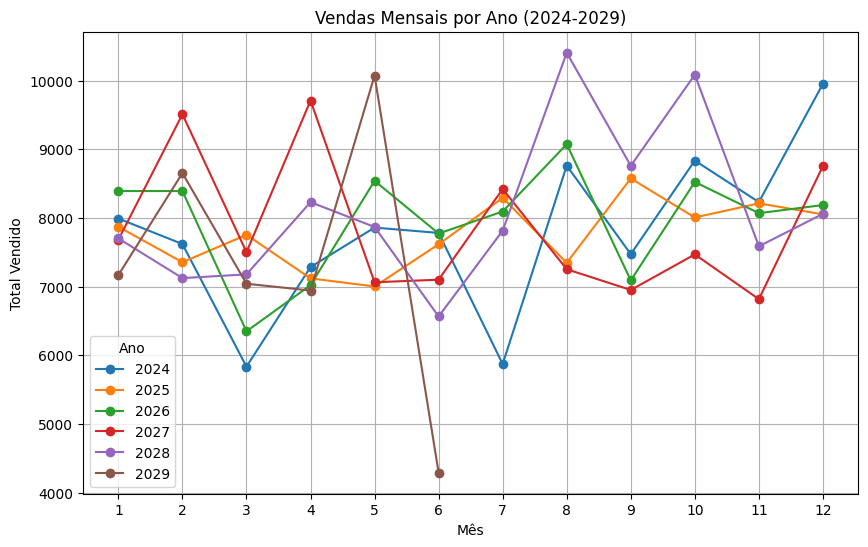

In [25]:
df['Data_de_vendas'] = pd.to_datetime(df['Data_de_vendas'], errors='coerce')
df_filtrado = df[df['Data_de_vendas'].dt.year.isin([2024, 2025, 2026, 2027, 2028, 2029])]

# Crie colunas auxiliares
df_filtrado['Ano'] = df_filtrado['Data_de_vendas'].dt.year
df_filtrado['Mes'] = df_filtrado['Data_de_vendas'].dt.month

# Agrupe por ano e mês
vendas_mensais = df_filtrado.groupby(['Ano', 'Mes'], as_index=False)['Vendidos'].sum()
vendas_mensais
# Agora, vendas_mensais terá as colunas 'Ano', 'Mes' e 'Vendidos'

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for ano in vendas_mensais['Ano'].unique():
    dados_ano = vendas_mensais[vendas_mensais['Ano'] == ano]
    plt.plot(
        dados_ano['Mes'],
        dados_ano['Vendidos'],
        marker='o',
        label=str(ano)
    )

plt.xlabel('Mês')
plt.ylabel('Total Vendido')
plt.title('Vendas Mensais por Ano (2024-2029)')
plt.legend(title='Ano')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

In [26]:
faturamento_ano = df.groupby(df['Data_de_vendas'].dt.year)['Vendidos'].sum().reset_index().sort_values(by="Vendidos", ascending=False)
print(faturamento_ano)
# Percebemos que o ano que mais lucramos foi o entre 2028 e 2024 e que de 24 e 25 foi aumentando até 2028, e que houve algo que fez as vendas cairem quase pela metade, observar oque houve para maximizar as vendas 


   Data_de_vendas  Vendidos
4            2028     97384
2            2026     95509
3            2027     94240
0            2024     93501
1            2025     93208
5            2029     44170


In [27]:
faturamento_Mês = df.groupby(df['Data_de_vendas'].dt.month)['Vendidos'].sum().reset_index().sort_values(by="Vendidos", ascending=False)
print(faturamento_Mês.head)
# Percebemos que o mês 2 e 5 venderam bem e que foi se mantendo mais reduzindo as vendas, demonstrando uma estabilidade de certa forma nas vendas

<bound method NDFrame.head of     Data_de_vendas  Vendidos
1                2     48655
4                5     48410
0                1     46809
3                4     46310
11              12     43011
9               10     42923
7                8     42843
2                3     41660
5                6     41127
10              11     38918
8                9     38850
6                7     38496>


In [28]:
faturamento_dia = df.groupby(df['Data_de_vendas'].dt.day)['Vendidos'].sum().reset_index().sort_values(by="Vendidos", ascending=False)
print(faturamento_dia.head(5))
# Nota-se que o dia 5 em específico tem uma grande procura , quase 2mil vendas na frende da segunda data, devemos observar o dia 5 para saber por qual motivo ele vende mais

    Data_de_vendas  Vendidos
4                5     20418
8                9     18914
1                2     18556
0                1     18344
11              12     18157


In [29]:
df_cidade = df.groupby("cidade", as_index=False).agg({
    "Faturamento": "sum",   
    "Vendidos": "sum",      
    "latitude": "first",    
    "longitude": "first"    
})

import plotly.express as px

fig = px.scatter_map(
    df_cidade,
    lat="latitude",
    lon="longitude",
    size="Faturamento",      
    color="Faturamento",     
    hover_name="cidade",
    hover_data=["Vendidos", "Faturamento"],  # mostra vendas totais e faturamento
    size_max=30,
    zoom=4
)

fig.update_layout(map_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# Representação gráfica com plotly.express das cidade com maior faturamento

In [30]:
df_vendedor = df.groupby("Vendedor", as_index=False).agg({
    "Faturamento": "sum",    
    "Vendidos": "sum",      
    "latitude": "first",    
    "longitude": "first"  
})

import plotly.express as px

fig = px.scatter_map(
    df_vendedor,
    lat="latitude",
    lon="longitude",
    size="Faturamento",     
    color="Faturamento",      
    hover_name="Vendedor",  
    hover_data=["Vendidos", "Faturamento"],  
    size_max=30,
    zoom=4
)

fig.update_layout(map_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Representação gráfica com plotly.express das Vendedores com maior faturamento


### Outras estatistícas básicas

In [31]:
df['Vendidos'].mean()
# Temoos que a média de vendas ficou por 259 itens diariamente

np.float64(259.006)

In [32]:

df['Estoque'].mean()
# Temoos que a média de itens não vendidos ficou por 488 itens diariamente

np.float64(487.692)

In [33]:
df['Produto'].mode()
# Temos que o produto que mais vendeu foi

0    Algodão
Name: Produto, dtype: object

In [34]:
df['Categoria'].unique() # NÃO EXITE MAIS A COLUNA CATEGORIA

KeyError: 'Categoria'

In [ ]:
df.drop(columns=["Categoria"], inplace=True)
df
# Removemos a coluna "categoria pois ela estava irrelevante para a análise e trazia dados inconsistentes demias para tratar"

,Produto,Estoque,Vendidos,Data_de_vendas,Vendedor,cidade,latitude,longitude,Preco_kg,Faturamento,Não_vendidos
0,Café,466,277,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308,38.57,10683.89,17973.62
1,Soja,191,37,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896,2.33,86.21,445.03
2,Cana-de-açúcar,241,241,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166,1.28,308.48,308.48
3,Arroz,222,283,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237,1.56,441.48,346.32
4,Arroz,370,432,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400,1.56,673.92,577.20
...,...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,493,336,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308,1.56,524.16,769.08
1996,Cana-de-açúcar,457,385,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658,1.28,492.80,584.96
1997,Algodão,316,276,2029-06-20,Maria,Recife,-8.047560,-34.877000,17.68,4879.68,5586.88
1998,Trigo,65,319,2029-06-21,João,Salvador,-12.971399,-38.501305,1.42,452.98,92.30


## Estatistica básica (Desvio padrão, Vareiância e coeficiente de variação)
- Variância: É a média dos quadrados entre cada valor e a média. Informa quão distantes os valores estão da média 
- Desvio Padrão: É a raiz quadrada da variância Expressa a dispersão em termos da mesma unidade de dados
- Coeficiente de variação:É o desvio padrão dividido pela média, expresso em porcentagem. Indica a variabilidade relativa dos dados em relação a média

In [ ]:
df['Vendidos'].var()
# Variância de vendidos, está muito alto, ou seja os dados estão bem diferentes entre si(inconsatantes)

np.float64(30134.226077038522)

In [ ]:
df['Vendidos'].std()  # Tem uma diferença de mais ou menos 173 vendas entre si seja pra mais seja pra menos

np.float64(173.59212561933367)

In [ ]:
df['Vendidos'].std() / df['Vendidos'].mean() * 100
#A dispersão dos dados é considerável, mas não exagerada. Em média, cada valor de vendas difere da média uma boa parte da média (mais da metade).
#Isso confirma que os dados não são super consistentes, mas também não são totalmente caóticos.


np.float64(67.02243408235087)

## Medidas de Forma (distribuição dos dados)
- Assimetria: Indica o grau e direção da distorção da distribuição em relação à média. Se positivo, indica a cauda direita da distribuição mais longa, já o oposto a cauda esquerda mais longa(Quando for positivo valores maiores mais distantes, quando for negativo mais perto eles estão).
- Curtose: mede o pico ou "pontuação" da distribuição. Uma Curtose alta indica uma distribuição mais concentrada 

In [ ]:
df['Vendidos'].skew() 
# Essa assimetria perto de 1 indica altos graus dispersão, ou seja os dados estão m,uito espalhados

np.float64(0.9595618887978993)

In [ ]:
df['Vendidos'].kurtosis()
# Como a curtose estrá alta isso é bom, indica que estamos mais próximos da média de vendas e que mantemos uma certa "estabilidade" nas vendas 

np.float64(1.84885137858533)

In [ ]:
def format_number(value, prefix = ''):
    for unit in ['', 'mil']:
        if value < 1000:
            return f'{prefix} {value:.2f} {unit}'
        value /= 1000
    return f'{prefix} {value:.2f} milhões'

In [ ]:
df = df.to_csv('data/banco_agro_projeto_limpo.csv', index=False)
df = pd.read_csv('data/banco_agro_projeto_limpo.csv')

## Auto geração de relatório

In [ ]:
import sweetviz as sv
import numpy as np

if not hasattr(np, "VisibleDeprecationWarning"):
    class VisibleDeprecationWarning(Warning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning

report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
from autoviz.AutoViz_Class import AutoViz_Class


# Instancie a classe
AV = AutoViz_Class()

# Gere e salve as visualizações com um único comando
report = AV.AutoViz(filename='', dfte=df)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (2000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Produto,object,0.000000,0,,,No issue
Estoque,int64,0.000000,43,0.000000,999.000000,No issue
Vendidos,int64,0.000000,27,1.000000,998.000000,Column has 37 outliers greater than upper bound (764.00) or lower than lower bound(-268.00). Cap them or remove them.
Data_de_vendas,datetime64[ns],0.000000,99,,,Possible date-time colum: transform before modeling step.
Vendedor,object,0.000000,0,,,No issue
cidade,object,0.000000,0,,,No issue
latitude,float64,0.000000,NA,-30.034647,-3.101940,No issue
longitude,float64,0.000000,NA,-60.025000,-34.877000,No issue
Preco_kg,float64,0.000000,NA,1.090000,38.570000,Column has a high correlation with ['Não_vendidos']. Consider dropping one of them.
Faturamento,float64,0.000000,NA,1.090000,37798.600000,Column has 398 outliers greater than upper bound (3579.37) or lower than lower bound(-1756.55). Cap them or remove them.


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [41]:
# ...existing code...
try:
    from ydata_profiling import ProfileReport
    profile = ProfileReport(df, title="Relatório de Análise Exploratória")
    profile.to_file("relatorio_analise.html")
except Exception as e:
    # Fallback: use sweetviz se ydata_profiling não estiver disponível
    import sweetviz as sv
    report = sv.analyze(df)
    report.show_html("relatorio_analise.html")
# ...existing code...

                                             |          | [  0%]   00:00 -> (? left)

Report relatorio_analise.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 📊 Análise de Dados de Vendas Agrícolas

## Conclusão

Este projeto teve como objetivo analisar os dados de vendas de produtos agrícolas, utilizando Python e Pandas, com foco em **insights financeiros e geográficos**.  

### 1️⃣ Estatísticas de vendas

- **Faturamento total por produto:**  
  Foi possível calcular o faturamento total de cada produto a partir da multiplicação de `Vendidos` pelo `Preco_kg`.  
  Produtos como **Café e Algodão** se destacaram com faturamentos maiores.

- **Perdas com produtos não vendidos:**  
  Multiplicando `Estoque` pelo `Preco_kg`, identificamos os produtos com maiores perdas. Por exemplo, Café apresentou as maiores perdas devido ao alto preço e volume em estoque.

- **Variabilidade das vendas:**  
  - **Variância de `Vendidos`:** 30.134 → indica que os dados apresentam dispersão significativa.  
  - **Desvio Padrão:** 173,59 → em média, cada registro de vendas difere ±174 unidades da média.  
  - **Coeficiente de Variação:** 67% → mostra que existe variabilidade considerável nas vendas em relação à média, indicando que nem todos os produtos vendem de forma uniforme.

### 2️⃣ Análise temporal

- As vendas foram agrupadas por **dia, mês e ano**, permitindo observar sazonalidade e tendências ao longo do tempo.

### 3️⃣ Análise geográfica

- Utilizando **Plotly Express**, foi possível criar mapas interativos mostrando:
  - **Faturamento total por cidade:** cada cidade aparece uma única vez, com pontos cujo tamanho e cor refletem o faturamento total.  
  - **Faturamento por vendedor:** cada vendedor é representado por um ponto, mostrando o faturamento total que gerou e os produtos vendidos.  

Esses mapas permitem identificar **as regiões com maior desempenho de vendas** e quais vendedores estão contribuindo mais para o faturamento.

### 4️⃣ Insights gerais

- Os dados apresentam **vendas inconsistentes entre produtos,cidades e vendedores**, com algumas regiões e produtos dominando o faturamento.  
- É possível **priorizar produtos e regiões** com maior retorno financeiro, além de identificar **oportunidades de reduzir perdas** em estoque.  
- A visualização geográfica facilita **decisões estratégicas** para logística e planejamento de vendas.

---

📌 **Resumo:** Este projeto demonstra a importância de combinar **estatísticas descritivas** com **visualizações interativas**, oferecendo uma visão clara do desempenho de produtos, vendedores e regiões no negócio agrícola, concluindo-se que a análise da forma como estamos estocando alimentos ser repensada.
